Kaggle Task with 20M dataset

In [188]:
import pandas as pd # import libraries

In [22]:
ratings = pd.read_csv(r'C:\Users\KULBKUS\Downloads\MovieLensDataset\rating.csv')

In [23]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39


In [24]:
tags = pd.read_csv(r'C:\Users\KULBKUS\Downloads\MovieLensDataset\tag.csv')
tags.head(3)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19


In [37]:
movies = pd.read_csv(r"C:\Users\KULBKUS\Downloads\MovieLensDataset\movie.csv",sep=',')
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [26]:
print(tags.columns)
print(ratings.columns)
print(movies.columns)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


In [28]:
del(tags['timestamp'])
del(ratings['timestamp'])

In [29]:
print(tags.columns)
print(ratings.columns)
print(movies.columns)

Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


In [30]:
tags.head(3)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero


In [40]:
# SERIES 
row_0 = tags.iloc[0]
print(type(row_0))

<class 'pandas.core.series.Series'>


In [41]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [42]:
row_0['userId']

np.int64(18)

In [ ]:
'rating' in row_0 # check  index

False

In [46]:
row_0.name

0

In [47]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

In [48]:
row_1= tags.iloc[1]
row_1

userId            65
movieId          208
tag        dark hero
Name: 1, dtype: object

In [50]:
row_2=tags.iloc[2]
row_2

userId            65
movieId          353
tag        dark hero
Name: 2, dtype: object

In [53]:
row_1['tag']

'dark hero'

In [54]:
row_1.name

1

In [57]:
'tag' in row_1

True

DataFrame

In [59]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [60]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [62]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [64]:
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


## Descriptive Statistics

In [67]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [68]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [70]:
print(ratings['rating'].mean())

3.5255285642993797


In [71]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [74]:
ratings['rating'].min()

0.5

In [75]:
ratings['rating'].max()

5.0

In [76]:
ratings['rating'].count()

np.int64(20000263)

In [77]:
ratings['rating'].std()

1.051988919275684

In [78]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [80]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [87]:
# Create a filter 
filter1 = ratings['rating']>10
print("ANY Method result : ",filter1.any())
print(filter1.head(5))

ANY Method result :  False
0    False
1    False
2    False
3    False
4    False
Name: rating, dtype: bool


In [93]:
filter2 = ratings['rating']>0
filter2.all()

np.True_

## Data Cleaning: Handling Missing Data

In [94]:
movies.shape

(27278, 3)

In [97]:
movies.isnull().any().any()

np.False_

In [98]:
print(ratings.shape)
ratings.isnull().any().any()

(20000263, 3)


np.False_

In [99]:
print(tags.shape)
tags.isnull().any().any()

(465564, 3)


np.True_

> WE have few tags which are NULL 

In [100]:
# drop null values 
tags = tags.dropna()

In [102]:
tags.isnull().any().any()

np.False_

In [104]:
tags.shape

(465548, 3)

📊 Data Visualization

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

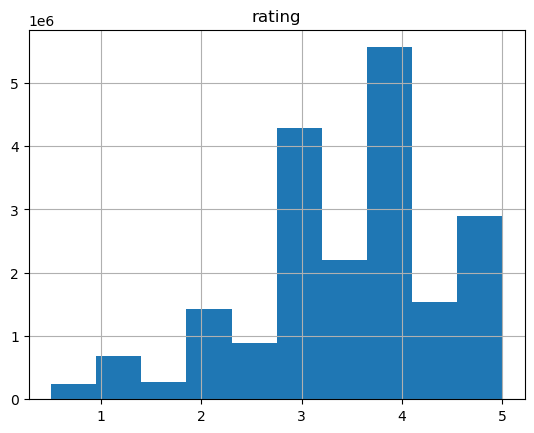

In [112]:
ratings.hist(column='rating')
plt.show()

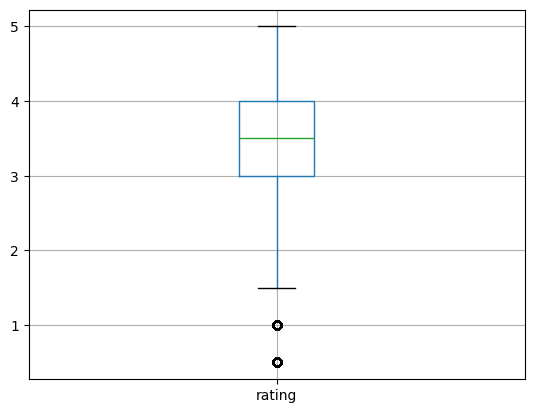

In [113]:
ratings.boxplot(column='rating')
plt.show()

## 📤 Slicing Out Columns

In [115]:
tags['tag'].head(3)

0    Mark Waters
1      dark hero
2      dark hero
Name: tag, dtype: object

In [116]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings[-10:] # Ls=ast 10 entries

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [123]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
Hell naw                      1
This is my happy face         1
I heel toe on Uday's house    1
Why?                          1
Bobo                          1
Diamond Dallas Page           1
I'm Devon Butler!             1
No arguement                  1
Really Bad                    1
Botox                         1
Name: count, dtype: int64

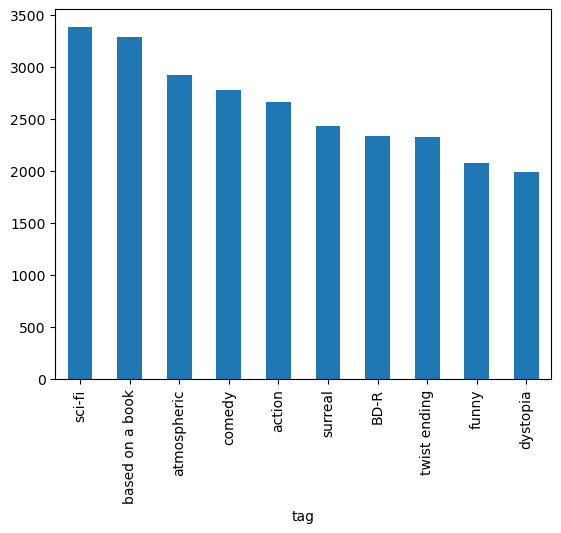

In [ ]:
tag_counts[:10].plot(kind='bar')
plt.show()  

In [141]:
is_highly_rated = ratings['rating']>=5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [144]:
is_action=movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [145]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


## 👥 Group By and Aggregate

In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count
# here All the rating are grouped by movieCount

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count().rename(columns={'movieId':'Count'})
ratings_count
# column renamed as Count

,Count
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [157]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean().rename(columns={'rating':'Mean'})
average_rating.head()
# here All the rating are grouped by movieId and its mean is calculated

,Mean
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [158]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count().rename(columns={'rating':'Count'})
movie_count.head()
# column renamed as Count

,Count
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


## 🔰 Merge Dataframes

In [159]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [160]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [163]:
t = movies.merge(tags, on ='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


#### 📚 Combine aggreagation, merging, and filters to get useful analytics

In [168]:
avg_ratings = ratings.groupby('movieId', as_index = False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [169]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [170]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [171]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [172]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


### 📝 Vectorized String Operations

In [173]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [175]:
# Split 'genres' into multiple columns
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:11]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [176]:
# Add a new column for comedy genre flag

movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:11]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


### 📟 Extract year from title e.g. (2007)

In [177]:
movies['title']

0                          Toy Story (1995)
1                            Jumanji (1995)
2                   Grumpier Old Men (1995)
3                  Waiting to Exhale (1995)
4        Father of the Bride Part II (1995)
                        ...                
27273          Kein Bund für's Leben (2007)
27274         Feuer, Eis & Dosenbier (2002)
27275                    The Pirates (2014)
27276                   Rentun Ruusu (2001)
27277                      Innocence (2014)
Name: title, Length: 27278, dtype: object

In [180]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand =True)
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


### 🕐 Parsing Timestamps

In [184]:
tags = pd.read_csv(r'C:\Users\KULBKUS\Downloads\MovieLensDataset\tag.csv')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [185]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
# Convert type of timestamp column from object to datetime
tags['timestamp'] = pd.to_datetime(tags['timestamp'], errors='coerce')
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [197]:
tags.dtypes

userId                int64
movieId               int64
tag                  object
timestamp    datetime64[ns]
dtype: object

In [199]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18


In [200]:
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp      datetime64[ns]
parsed_time    datetime64[ns]
dtype: object

In [201]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [203]:
tags.sort_values(by='timestamp', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02
